In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from pprint import pprint
import seaborn as sns

In [11]:
engagement_df = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding = 'latin-1')

In [12]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [14]:
len(users.object_id.unique())

12000

In [15]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [17]:
print('# Of Users: {}:'.format(len(engagement_df.user_id.unique())))

# Of Users: 8823:


In [18]:
#Convert time_stamp column to type datetime
engagement_df['date_time'] = pd.to_datetime(engagement_df.time_stamp)

In [19]:
#Extract just the dates and dropping the timestamps
engagement_df['date'] = engagement_df.date_time.dt.date

Since the criteria for an "adopted user" is a user who has logged into the product on three seperate days in at least one seven-day period, we can go ahead and filter out those users who haven't logged in at least 3 times

In [20]:
#Create a boolean mask dictionary to remove users with less than 7 days logging in
#Key is the user ID
#Value is if the user had 7 or more days logging in
boolean = pd.Series.to_dict(engagement_df.groupby('user_id').count().date >= 3)
boolean

{1: False,
 2: True,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 10: True,
 11: False,
 13: False,
 14: False,
 17: False,
 19: False,
 20: True,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 33: True,
 36: False,
 37: False,
 41: False,
 42: True,
 43: True,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: True,
 51: False,
 53: True,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: True,
 60: True,
 61: False,
 63: True,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: True,
 72: False,
 73: False,
 74: True,
 75: False,
 76: False,
 77: True,
 78: False,
 80: True,
 81: True,
 82: True,
 83: False,
 84: False,
 85: False,
 86: False,
 87: True,
 88: False,
 89: False,
 90: False,
 91: False,
 92: False,
 94: False,
 95: True,
 96: False,
 97: False,
 98: False,
 99: False,
 100: False,
 101: False,
 103: False,
 105: False,
 106: False,
 

In [21]:
engagement = engagement_df.copy()
engagement['keep_user'] = engagement.user_id.map(boolean)
engagement.head(20)

,time_stamp,user_id,visited,date_time,date,keep_user
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22,False
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True


In [22]:
engagement = engagement[engagement.keep_user == True]

In [103]:
print('Number of users with at least 3 login days: {}'.format(len(engagement.groupby('user_id')['keep_user'].count())))

Number of users with at least 3 login days: 1656


That reduced our total users from 8863 to 2248. That'll make the next processing step easier. We now need to parse through all the dates for the users with more than 3 logon days and determine if there's 3 login dates within a one week timespan. To do this, we will look at the first login date for each user. If the login timestamp, 2 logins from the first timestamp, is less than or equal to 7 days away from the first login timestamp, then that automatically means the login timestamp 1 login away from the first timestamp is also within the one week timespan satisfying the criteria of 3 logins in a one week span and we should return True. If the 2nd login from the first is more than 7 days, then iterate to the next login timestamp and repeat the process of checking the login that is 2 logins away from the current one. If none of the dates satisfies the criteria, then return False

* login \#1: 01/20/1987
* login \#2: 01/23/1987
* login \#3: 01/26/1987
* login \#4: 01/31/1987
> Select login \#1 as the reference login. Then compare it to login \#3. If it is less than or equal to 7 days away, then that automatically means login \#2 is in the same 7 day span, and we have satisfied the criteria of 3 logins in a 7 day span. In the example dates, it is indeed satisfied. If they weren't however, then login \#2 would then become the reference login, and login \#4 would then be analyzed

In [24]:
# Create a list of all the user ID's
user_ids = [k for k,v in engagement.groupby('user_id')]

In [25]:
grouped = engagement.groupby('user_id')['date_time']

In [26]:
def valid_login(x):
    '''This function takes in a list of login time stamps and returns whether or not there are at least 3 logins
    in a one week time span
    
    Inputs
    x --> a list of dates
    
    Outputs
    Boolean True or False'''
    
    length = len(x)
    idx = 0
    # loop through each date in the list starting with the first date and ending at 2nd to the last date in the list
    while idx < (length - 2):
        #Check if the timestamp that is 2 timestamps away from the current is greater than 7 days
        if (x[idx + 2] - x[idx]).days > 7:
            #Increment idx to make the next timestamp in the list the referenced timestamp
            idx += 1
            continue
            
        else:
            #return true that the critera is satisfied
            return True  
    #after looping through all timestamps return false since the critera isn't satisfied
    return False

In [27]:
def check_criteria(grouped, users):
    '''This function has two inputs; a groupby dataframe and a list of users and returns a dictionary with 
    user_ids as keys and a boolean (True or False) as the value indicating if that user satisfies the 
    "adopted user" critera
    
    Inputs
    grouped --> dataframe groupedby user_ids and column of date_time
    
    Outputs
    bool_dict --> Dictionary with user_ids as the keys and boolean True or False as the value
    '''
    # Create an empty dictionary to update
    bool_dict = {}
    
    # Create a list of lists of all the dates for each user
    dates = [list(grouped.get_group(x)) for x in users]
    #Iterate through each list of dates for the corresponding user and check criteria
    for pos,user in enumerate(users):
        #update dictionary
        bool_dict[user] = valid_login(dates[pos])
    return bool_dict

In [28]:
bool_dict = check_criteria(grouped,user_ids)

In [29]:
bool_dict

{2: True,
 10: True,
 20: True,
 33: True,
 42: True,
 43: True,
 50: True,
 53: True,
 59: False,
 60: True,
 63: True,
 69: True,
 74: True,
 77: False,
 80: True,
 81: True,
 82: True,
 87: True,
 95: False,
 126: False,
 133: True,
 135: True,
 136: False,
 141: True,
 142: False,
 146: True,
 153: True,
 160: True,
 165: True,
 168: True,
 171: False,
 172: True,
 174: True,
 185: True,
 188: True,
 197: True,
 200: True,
 202: True,
 203: True,
 209: True,
 214: True,
 221: False,
 230: True,
 241: False,
 245: True,
 247: True,
 251: False,
 263: True,
 265: True,
 275: True,
 277: False,
 280: True,
 283: True,
 297: True,
 298: True,
 305: True,
 310: True,
 311: True,
 321: True,
 322: True,
 330: False,
 337: False,
 341: True,
 345: True,
 347: True,
 351: True,
 362: True,
 363: True,
 367: False,
 370: True,
 375: False,
 382: False,
 383: True,
 390: False,
 397: True,
 398: False,
 401: True,
 417: False,
 418: True,
 430: True,
 445: True,
 450: True,
 455: False,
 460

User_id # 59 has appeared to fail, let's check visually to ensure proper functionality of our algorithm

In [30]:
grouped.get_group(59)

737   2014-03-10 03:21:57
738   2014-05-08 03:21:57
739   2014-06-01 03:21:57
Name: date_time, dtype: datetime64[ns]

Update the engagement dataframe with only those users who satisfy the criteria. First let's drop the "keep_user" column so we can reuse it again for the boolean mapping we just created

In [31]:
engagement = engagement.drop("keep_user", axis = 1)

Perform another mapping of 'keep_user' with the new bool_dict we just created

In [32]:
engagement['keep_user'] = engagement.user_id.map(bool_dict)

In [33]:
engagement.head(20)

,time_stamp,user_id,visited,date_time,date,keep_user
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True
10,2014-02-13 03:45:04,2,1,2014-02-13 03:45:04,2014-02-13,True


Now filter the resulting dataframe for those users who have satisifed the criteria

In [34]:
engagement = engagement[engagement.keep_user == True]

In [35]:
print('Number of "Adopted Users": {}'.format(len(engagement.user_id.unique())))

Number of "Adopted Users": 1656


So now we have reduced our number of users from 8800+ to 1656 users. We can now make a list of "Adopted Users" and use it to filter down the "users" dataframe and begin the investigation on what is the best predictor of furutre "adopted users"

In [36]:
# Create a list of all adopted user id's
adopted_users = engagement.user_id.unique()

In [37]:
def keep_user(x, users):
    if x in users:
        return 1
    else:
        return 0

In [38]:
# Mark those users who were adopted in the overall dataframes
users['adopted_user'] = users.object_id.apply(lambda x: keep_user(x, adopted_users))

In [104]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [41]:
engagement_df['adopted_user'] = engagement_df.user_id.apply(lambda x: keep_user(x, adopted_users))

In [105]:
engagement_df.head()

,time_stamp,user_id,visited,date_time,date,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22,0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,1
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,1
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,1
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,1


In [48]:
#adopted users login statistics
adopted_min_login = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().min()
adopted_max_login = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().max()
adopted_avg_login = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().mean()

In [101]:
print(' Login average for adopted users is ',adopted_avg_login, '\n',
      'Maximum number of logins for an adopted user is ',adopted_max_login, '\n',
      'Minimum number of logins for an adopted user is ',adopted_min_login)

 Login average for adopted users is  119.7626811594203 
 Maximum number of logins for an adopted user is  606 
 Minimum number of logins for an adopted user is  3


In [54]:
y = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().sort_values(ascending = False)
x = range(len(engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().sort_values(ascending = False)))

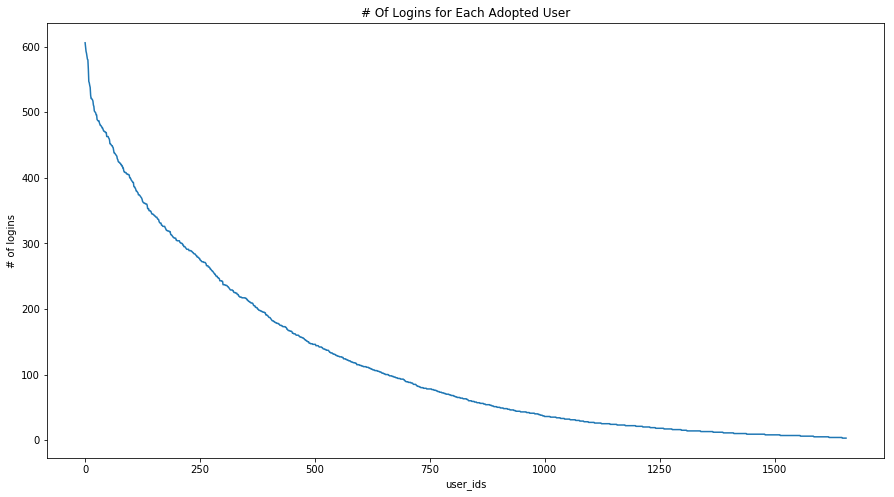

In [60]:
fig = plt.figure(figsize = (15,8))
plt.plot(x,y)
plt.xlabel('user_ids')
plt.ylabel('# of logins')
plt.title('# Of Logins for Each Adopted User')
plt.show()

In [63]:
#unadopted users login statistics
unadopted_min_login = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().min()
unadopted_max_login = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().max()
unadopted_avg_login = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().mean()

In [102]:
print(' Login average for adopted users is ',unadopted_avg_login, '\n',
      'Maximum number of logins for an adopted user is ',unadopted_max_login, '\n',
      'Minimum number of logins for an adopted user is ',unadopted_min_login)

 Login average for adopted users is  1.3380772987302916 
 Maximum number of logins for an adopted user is  15 
 Minimum number of logins for an adopted user is  1


In [58]:
yu = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().sort_values(ascending = False)
xu = range(len(engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().sort_values(ascending = False)))

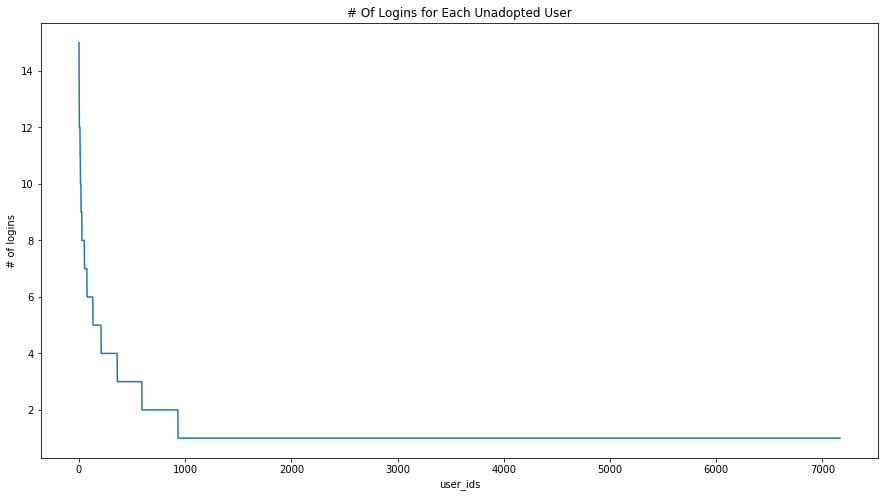

In [62]:
plt.figure(figsize = (15,8))
plt.plot(xu,yu)
plt.xlabel('user_ids')
plt.ylabel('# of logins')
plt.title('# Of Logins for Each Unadopted User')
plt.show()

It appears initially that the greatest predictor of adoption is the number of logins. Adopted users login by far more times than the unadopted. This seems a little simple and obvious, but let's explore a few other statistics before going with the low hanging fruit

#### Percentage of adopted vs unadopted users with respect to opting into the mailing list

In [90]:
users.groupby(['opted_in_to_mailing_list','adopted_user'])['object_id'].count() / len(users)

opted_in_to_mailing_list  adopted_user
0                         0               0.64825
                          1               0.10225
1                         0               0.21375
                          1               0.03575
Name: object_id, dtype: float64

#### Percentage of adopted vs unadopted users with respect to their creation source

In [89]:
users.groupby(['creation_source','adopted_user'])['object_id'].count() / len(users)

creation_source     adopted_user
GUEST_INVITE        0               0.149500
                    1               0.030750
ORG_INVITE          0               0.306667
                    1               0.047833
PERSONAL_PROJECTS   0               0.161583
                    1               0.014333
SIGNUP              0               0.148750
                    1               0.025167
SIGNUP_GOOGLE_AUTH  0               0.095500
                    1               0.019917
Name: object_id, dtype: float64

#### Percentage of adopted vs unadopted users with respect to enabled market drip

In [94]:
users.groupby(['enabled_for_marketing_drip','adopted_user'])['object_id'].count() / len(users)

enabled_for_marketing_drip  adopted_user
0                           0               0.734083
                            1               0.116583
1                           0               0.127917
                            1               0.021417
Name: object_id, dtype: float64

# Conclusion
--------------------------------------

With just a brief data exploration, it appears that the greatest indicator of adoption is how many times a user logs in. The unadopted users logged in on average 1.33 times. Conversely adopted users had an average login of 119.76. This seems to obvious of a metric, but due to the shear imbalance of adopted users versus unadopted, there's not good way to extract meaningful statistics out of the categorical data provided